In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params(tex=True)

### Cluster Survival Curves
This notebook contains a few example plots from cluster models of the magnetic fields with ALP probabilities calculated from their profiles.

In [2]:
# load data from Marsh and Libanov codes 
import os
folder = os.path.dirname(alpro.__file__)
fname = "mass13_g12.3/PE_mean_ma_13_g_12.3_mod.dat".format(folder)
E1, E2, Pmarsh, Ps = np.genfromtxt(fname, unpack=True)
energies_marsh = 0.5 * (E2 + E1) * 1e3

In [3]:


# initialise cluster models 
s1 = alpro.Survival("1275b")
s1.init_model()
#s1.cluster.n25 *= FACTOR

energies_marsh = 0.5 * (E2 + E1) * 1e3 
energies = np.logspace(3,4,1000)
#energies = np.linspace(1e3,1e4,1000)
#energies = energies_marsh


# set axion parameters
g = (10.0**(-12.3)) * 1e-9   # 1e-12.3 GeV^-1
mass = 1e-13       # 1e-13 eV
s1.set_params(g, mass)

# virial radius of 1.8 Mpc
Lmax = 1800.0 

# compute curves for different model instances
N = 100
nseeds = 2
Ptot = np.zeros( (nseeds,N,len(energies)) )
for seed in np.arange(N):
    for nseed in range(nseeds):
        Ptot[nseed,seed,:] = 1.0 - s1.get_curve(energies,(nseed*100)+seed, Lmax, r0=0.0)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


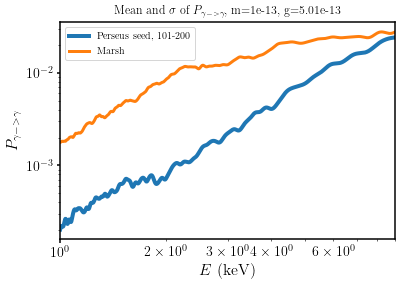

In [4]:
# make plots 
energies_marsh = 0.5 * (E2 + E1) * 1e3 
labels = ["Perseus seed 1-100", "Perseus seed, 101-200"]
# energies = energies/ (0.01790+1)
for i in range(1,2):
    P = Ptot[i,:,:]
    mean_P = np.mean(P, axis=0)
    plt.plot(energies/1e3, 1-mean_P, lw=4, label=labels[i])
    sigma = np.std(P, axis=0)
    #plt.fill_between(energies/1e3, mean_P-sigma, mean_P+sigma, alpha=0.5)
    
#for i in range(100):
#    plt.plot(energies/1e3, Ptot[1,i,:], lw=2, c="k", ls="-", alpha=0.3)

#plt.plot(energies/1e3, Ptot[1,10,:], lw=2, c="k", ls=":", label="1821, Realisation 1")
#plt.plot(energies/1e3, Ptot[1,20,:], lw=2, c="k", ls="--", label="1821, Realisation 2")
plt.plot(energies_marsh/1e3, 1-Pmarsh, label="Marsh")
#plt.fill_between(energies_marsh/1e3, 1-(Pmarsh-Ps, Pmarsh+Ps, alpha=0.5)

plt.xlabel("$E$ (keV)", fontsize=16)
plt.ylabel("$P_{\gamma->\gamma}$", fontsize=16)
plt.legend()
plt.title(r"Mean and $\sigma$ of $P_{{\gamma->\gamma}}$, m={}, g={:.2e}".format(mass, g/1e-9))
plt.xlim(1,9)
#plt.ylim(0.95,1.0)
plt.semilogx()
plt.semilogy()
plt.savefig("perseus-mean-test.png", dpi=100)

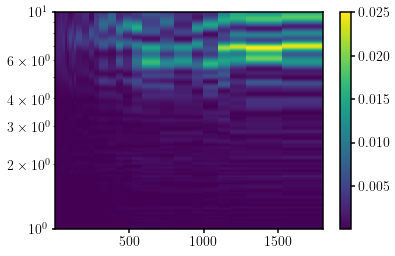

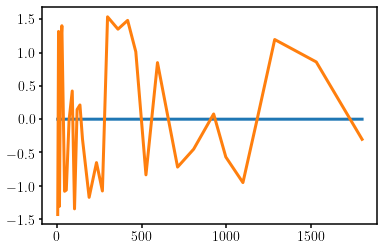

In [5]:
P, profile = s1.get_curve(energies, 50, Lmax, r0=0.0, radial_profile=True)

plt.semilogy()
plt.pcolormesh(s1.domain.r, energies/1e3, profile.T)
plt.colorbar()
# print (s1.domain.B, s1.domain.r)

plt.figure()
plt.plot(s1.domain.r, s1.domain.B)
plt.plot(s1.domain.r, s1.domain.phi)

[]

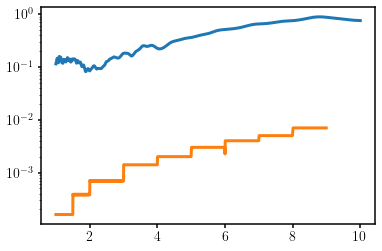

In [6]:
from scipy.interpolate import interp1d 
fmarsh = interp1d(energies_marsh, Pmarsh, fill_value="extrapolate")
plt.plot(energies/1e3, (1-mean_P)/(1-fmarsh(energies)))
marsh_bins = energies_marsh[1:] - energies_marsh[:-1]
plt.plot(energies_marsh[1:]/1e3, marsh_bins/1e3)
plt.semilogy()

[  6.0241688    5.14138966   6.51036943  11.32684108   5.5549716
   6.65014397  12.59321349  17.00716099   9.6417449   16.25349803
  25.88351008  14.78737006  15.6817269   15.76694992  18.94413771
  46.38356499  45.82284432  27.25615725  57.90138682  37.93379828
  48.58200073  93.5868136   96.63222973  67.28852726  62.92032166
  82.98856981  63.69681236  86.63386766 167.17701795  86.82700727
 167.32591326 189.71135158 128.99256976  54.57204909]


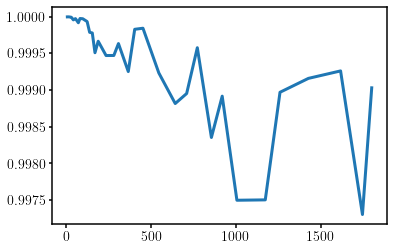

In [7]:
P, profile = s1.get_curve(energies, 100, Lmax, r0=0.0, radial_profile=True)

N = len(energies)//2
#plt.semilogy()
plt.plot(s1.domain.r, 1-profile[:,N])

print (s1.domain.deltaL)
# plt.colorbar()
# print (s1.domain.B, s1.domain.r)

# plt.figure()
#plt.plot(s1.domain.r, s1.domain.B)
#plt.plot(s1.domain.r, s1.domain.phi)